# Open data      

In [1]:
from funciones import abrir , dibujar , reducir
import numpy as np
#define the vectors to feed our neural networks 
ve = np.zeros((100,100,10000)) 
vm = np.zeros((100,100,10000))
#this should probably be a function , to automatize this
for i in range(0,200):
    if i<10:
        ve[:,:,i*50:(i+1)*50] = abrir("/home/deandres/alongz/relectron_0{}.root".format(i),(100,100,50)) ### electrons
    else:
        ve[:,:,i*50:(i+1)*50] = abrir("/home/deandres/alongz/relectron_{}.root".format(i),(100,100,50))
for i in range(0,40):
    if i<10:
        vm[:,:,i*250:(i+1)*250] = abrir("/home/deandres/alongz/rmuon_0{}.root".format(i),(100,100,250)) ### muons
    else:
        vm[:,:,i*250:(i+1)*250] = abrir("/home/deandres/alongz/rmuon_{}.root".format(i),(100,100,250))
# images of size 279x279

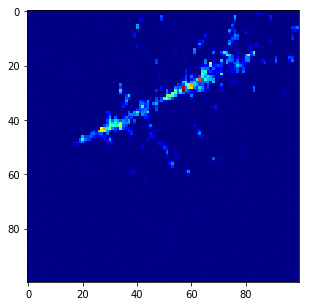

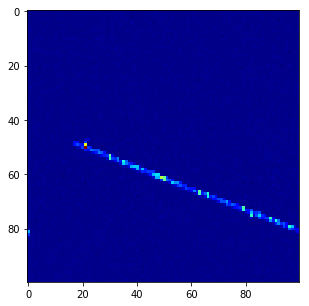

In [2]:
evento = 250
dibujar(evento,ve)
dibujar(evento,vm)
#dibujar(i,vm)

Our data set is made out of 10k $e^{-}$ and 10k $\mu^{-}$

As you can see in the images there is a small difference between muons and electrons. Muons are typically more. Furthermore, the following encoding is considered:
* $e^{-}= 1$
* $\mu^{-}= 0$

therefore,

In [3]:
# this may be a separated programme

ye = np.ones(10000) # labels for electrons
ym = np.zeros(10000) # labels for muons
X = np.zeros((20000,1,100,100)) # inilizalize the data set X
y=np.zeros(20000) # initialize labels 
X[:10000,0,:,:] = np.swapaxes(ve,0,2) # swapaxes for feeding keras
X[10000:,0,:,:] = np.swapaxes(vm,0,2) 
y[:10000] = ye
y[10000:] = ym
del ve # delete the variables, to not used un
del vm 

# randomly shuffle the arrays X and y, to the same order

In [4]:
#random shuffle program, this may be a separeted programme
s=np.arange(X.shape[0])
np.random.shuffle(s)
X=X[s,:,:,:]
y=y[s]

In [5]:
#separate our data set from train and test sets
separate = 2000
X_train , y_train = X[:separate,:,:,:] , y[:separate]
X_test , y_test = X[separate:,:,:,:] , y[separate:]

# Deep learning

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dropout , Flatten, Dense

Using TensorFlow backend.


In [7]:
# parameters
filters=6
kernel_size=5
pool=2
dropout=0.1

In [8]:
#convolutional block
model = keras.models.Sequential()

model.add(Conv2D(6, 5,activation='relu',data_format="channels_first",input_shape=(X.shape[1],X.shape[2],X.shape[3])))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(dropout))
print(model.layers[-1].output_shape)

model.add(Conv2D(12, 4,activation='relu',data_format="channels_first",input_shape=(X.shape[1],X.shape[2],X.shape[3])))
model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Dropout(dropout))
print(model.layers[-1].output_shape)


model.add(Flatten())
print(model.layers[-1].output_shape)

model.add(Dense(1,activation='sigmoid'))
print(model.layers[-1].output_shape)

(None, 6, 48, 48)
(None, 12, 22, 22)
(None, 5808)
(None, 1)


In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 96, 96)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 48, 48)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 48, 48)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 45, 45)        1164      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 22, 22)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 22, 22)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5808)              0         
__________

In [11]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Train on 2000 samples, validate on 18000 samples
Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4595 - val_loss: 0.0793
Epoch 2/10
2000/2000 [==============================] - 2s 938us/step - loss: 0.0163 - val_loss: 0.0129
Epoch 3/10
2000/2000 [==============================] - 2s 976us/step - loss: 0.0100 - val_loss: 0.0114
Epoch 4/10
2000/2000 [==============================] - 2s 951us/step - loss: 0.0060 - val_loss: 0.0174
Epoch 5/10
2000/2000 [==============================] - 2s 954us/step - loss: 0.0055 - val_loss: 0.0430
Epoch 6/10
2000/2000 [==============================] - 2s 957us/step - loss: 0.0046 - val_loss: 0.0107
Epoch 7/10
2000/2000 [==============================] - 2s 943us/step - loss: 0.0055 - val_loss: 0.0394
Epoch 8/10
2000/2000 [==============================] - 2s 955us/step - loss: 0.0170 - val_loss: 0.0077
Epoch 9/10
2000/2000 [==============================] - 2s 975us/step - loss: 0.0048 - val_loss: 0.0082
Epoch 10/10
2000/

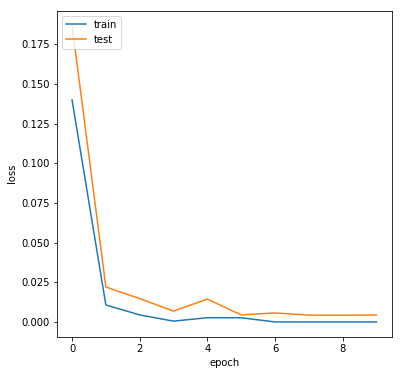

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

# Confusion matrix

[[8985    5]
 [  18 8992]]
[[9.99443826e-01 5.56173526e-04]
 [1.99778024e-03 9.98002220e-01]]


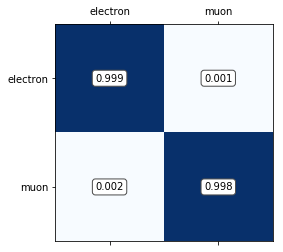

In [49]:
from sklearn.metrics import confusion_matrix

y_true = y_test > 0.5
y_pred = (model.predict(X_test) > 0.5)[:,0]

C=confusion_matrix(y_true,y_pred, labels=[True,False])
print(C)
##The normalized matrix is computed as
C_normalized=C.astype('float') / C.sum(axis=1)[:, np.newaxis]
print(C_normalized)
classes= ['electron','muon']
data=C_normalized
fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='Blues')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
x_pos = np.arange(len(classes))
plt.xticks(x_pos,classes)
y_pos = np.arange(len(classes))
plt.yticks(y_pos,classes)
title='confusion matrix'
plt.show()

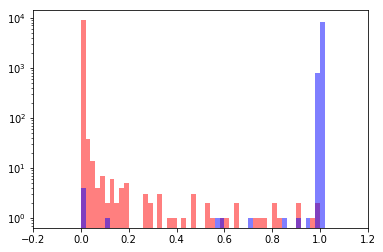

In [50]:
pred = model.predict(X_test)[:,0]
e=[]
mu=[]
i=0

for val in y_test:
    if val==1:
        e.append(pred[i])
    else:
        mu.append(pred[i])
    i=i+1
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(mu, bins=np.arange(0, 1.2, 0.02), ls='dotted', alpha = 0.5, lw=3, color= 'r')
ax.hist(e, bins=np.arange(0, 1.2, 0.02), ls='dotted', alpha = 0.5, lw=3, color= 'b')
ax.set_xlim(-0.2, 1.2)
#ax.set_ylim(0, 150)
plt.yscale("log")
plt.show()

# Print mistakes
The vector of mistakes can be computed using the following code

In [95]:
def labels(pred): # labels of predictions 
    predbi=pred > 0.5
    print(predbi.shape)
    return predbi[:,0]==y_test

def labels_wrong(labels):
    zeros = (labels == 0) 
    

In [96]:
labels = labels(model.predict(X_test))


(18000, 1)


In [97]:
labels_wrong = np.where(labels == False)
type_wrong = y[labels_wrong]

In [99]:
X_wrong = X_test[labels_wrong,:,:,:]  

In [100]:
wrong = X_wrong.reshape((36,100,100))

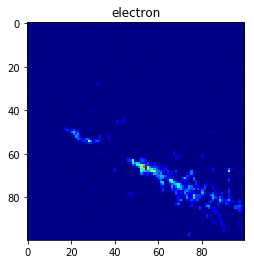

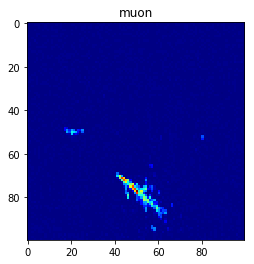

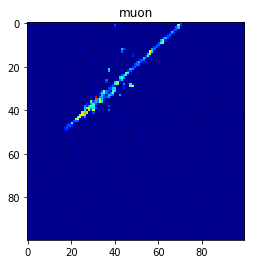

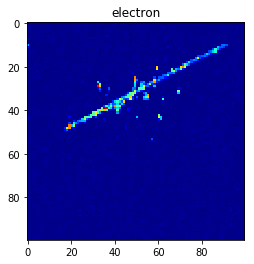

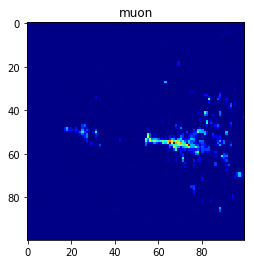

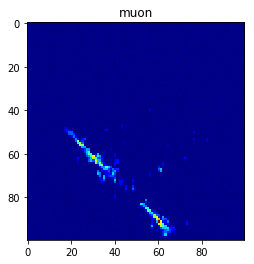

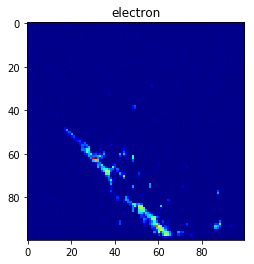

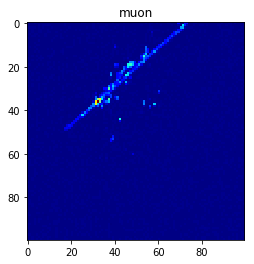

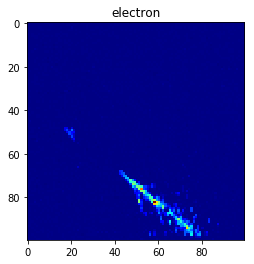

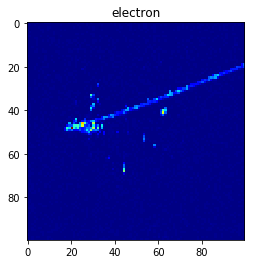

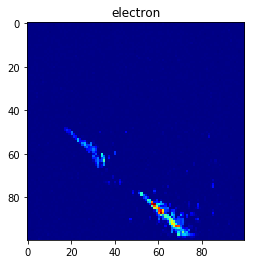

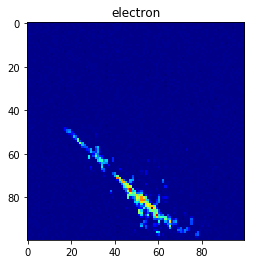

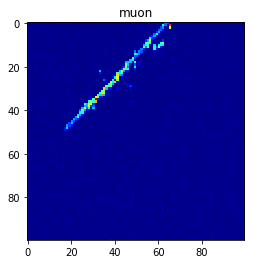

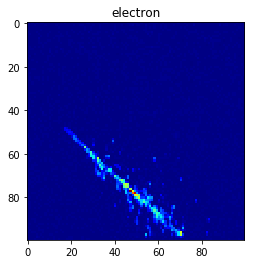

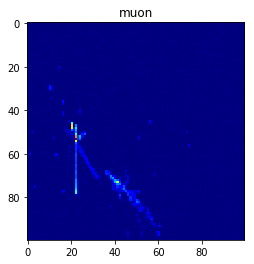

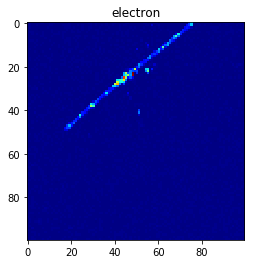

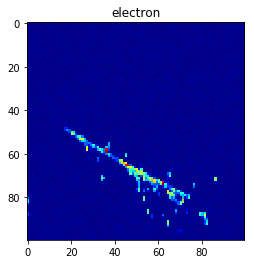

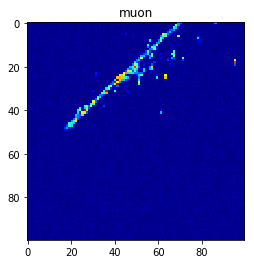

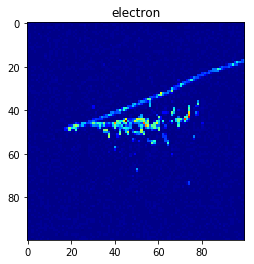

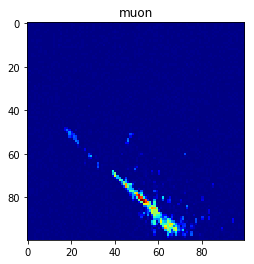

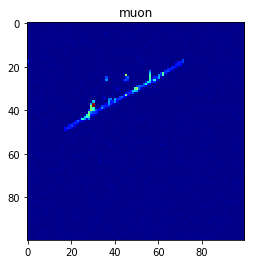

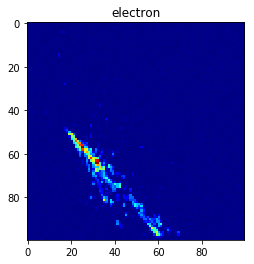

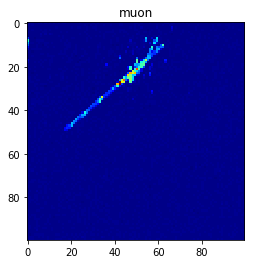

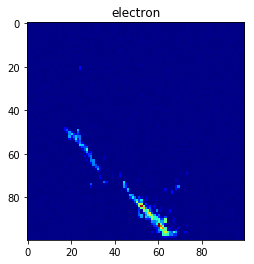

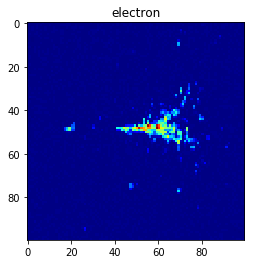

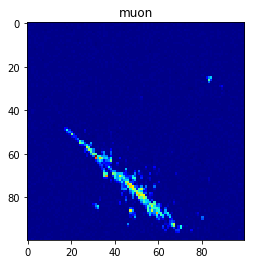

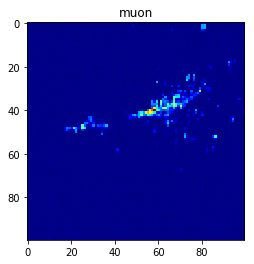

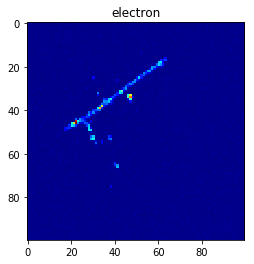

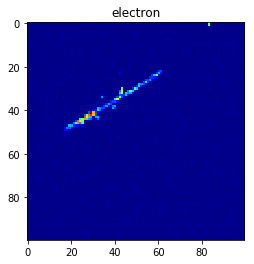

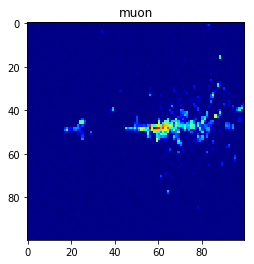

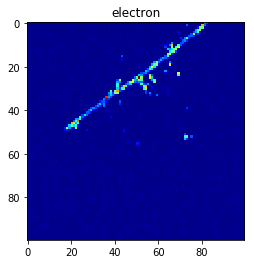

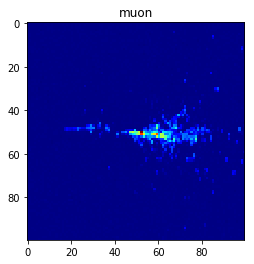

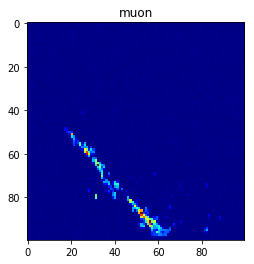

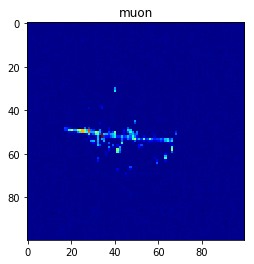

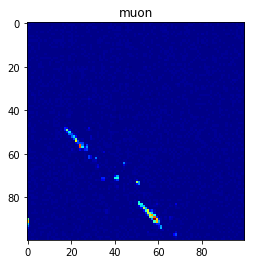

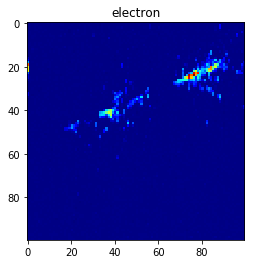

In [101]:
import matplotlib.pyplot as plt
for i in range(0,36):
    plt.imshow(wrong[i,:,:],cmap = 'jet',interpolation='none')
    if type_wrong[i]==1:
        plt.title("electron")
    else:
        plt.title("muon")
    plt.show()

**We can conclude that the neural net has lernt to differentiate between tracks with bremsstrahlung and trakcs without it**